In [6]:
from numpy import linalg as LA
import numpy as np
import pandas as pd
import math
import networkx as nx
import community

def compute_C_minus_C0(lambdas,v,lambda_plus,removeMarketMode=True):
    N=len(lambdas)
    C_clean=np.zeros((N, N))
    
    order = np.argsort(lambdas)
    lambdas,v = lambdas[order],v[:,order]
    
    v_m=np.matrix(v)

    # note that the eivenvalues are sorted
    for i in range(1*removeMarketMode,N):                            
        if lambdas[i]>lambda_plus: 
            C_clean=C_clean+lambdas[i] * np.dot(v_m[:,i],v_m[:,i].T)  
    return C_clean    
    
    
def LouvainCorrelationClustering(R):   # R is a matrix of return
    N=R.shape[1]
    T=R.shape[0]

    q=N*1./T
    lambda_plus=(1.+np.sqrt(q))**2

    C=R.corr()
    lambdas, v = LA.eigh(C)


            
    C_s=compute_C_minus_C0(lambdas,v,lambda_plus)
    
    mygraph= nx.from_numpy_array(np.abs(C_s))
    partition = community.community_louvain.best_partition(mygraph)

    DF=pd.DataFrame.from_dict(partition,orient="index")
    return (DF) 


In [4]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import yfinance as yf

alldata=pd.read_csv(r"D:\Document\EPFL_Coursework\FinancialBigData\clean\us_equities_logreturns.csv.gz")
alldata.drop(columns=["Unnamed: 0","^GSPC"], inplace=True)
tickers=alldata.columns.tolist()

all_data = pd.DataFrame()
for ticker in tickers:
    try:
        data = yf.download(ticker, start="2020-08-01", end="2021-01-01",progress=False)
        all_data[ticker] = data['Close']
    except Exception as e:
        print(f"Failed to retrieve data for {ticker}. Error: {e}")

# print(all_data.head())
data_subset=all_data.dropna(axis=1)
log_return=np.log(data_subset).diff()
log_return.head()


1 Failed download:
['UTX']: Exception('%ticker%: No timezone found, symbol may be delisted')

1 Failed download:
['NAV']: Exception('%ticker%: No timezone found, symbol may be delisted')

1 Failed download:
['AET']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-08-01 -> 2021-01-01)')

1 Failed download:
['CNW']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-08-01 -> 2021-01-01)')

1 Failed download:
['MOT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-08-01 -> 2021-01-01)')

1 Failed download:
['DBD']: Exception("%ticker%: Data doesn't exist for startDate = 1596254400, endDate = 1609477200")

1 Failed download:
['RSH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-08-01 -> 2021-01-01)')

1 Failed download:
['RTN']: Exception('%ticker%: No timezone found, symbol may be delisted')

1 Failed download:
['AVP']: Exception('%ticker%: No timezone found, symbol may be delisted')


,GE,IBM,DIS,BA,CAT,AA,HPQ,DD,KO,XOM,...,FAF,CEM,VSH,BIO,GM,FF,FIF,BFS,CTR,KIM
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-04,0.004898,0.012233,0.008047,0.017108,-0.001975,-0.000731,0.006730,0.013255,0.008388,0.028467,...,0.020084,0.028287,0.041495,-0.007902,0.006221,-0.006826,-0.001986,0.029390,0.026058,0.039775
2020-08-05,0.041473,-0.003104,0.084329,0.054294,0.025894,0.071282,0.004462,0.029106,0.011288,0.008704,...,0.002061,0.045220,0.017186,0.000835,0.020335,0.015855,0.008906,0.003249,0.027673,-0.019248
2020-08-06,-0.010998,0.005327,0.024844,-0.012007,-0.004307,0.014875,0.016557,-0.000366,0.005491,-0.004801,...,-0.003751,0.013562,-0.004711,-0.003952,0.010954,0.026609,0.001969,0.001297,0.031346,0.010545
2020-08-07,0.010998,-0.009240,-0.006827,-0.012740,0.003936,-0.015557,0.010887,0.020981,0.006717,-0.004594,...,0.013253,0.015909,-0.012474,-0.002077,0.003749,0.042134,0.000983,0.020203,-0.002207,0.041940


In [5]:
from market_state_strategy import market_state_strategy

df_chopped=market_state_strategy(log_return)

df_chopped['cumulative_perf'].plot()
plt.xlabel('time')
plt.ylabel('USD')
plt.title('Cumulative_performance')

TypeError: 'NoneType' object is not subscriptable

C:\Users\E.M.Lau\AppData\Local\Temp\ipykernel_15572\650695569.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_chopped['rolling_ret']=ret
C:\Users\E.M.Lau\AppData\Local\Temp\ipykernel_15572\650695569.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chopped['rolling_ret']=ret
C:\Users\E.M.Lau\AppData\Local\Temp\ipykernel_15572\650695569.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining 

Text(0.5, 1.0, 'Cumulative_return')

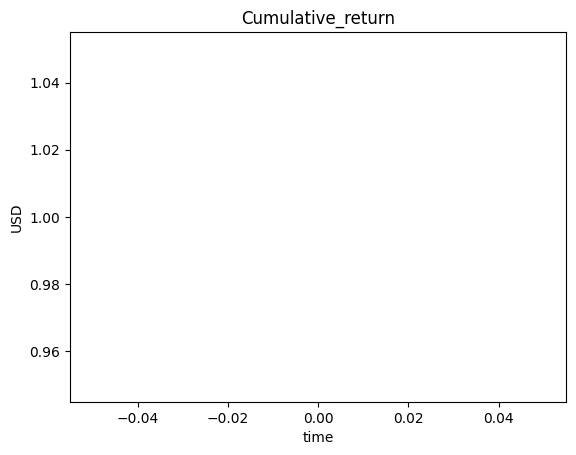

In [9]:
# data_subset=all_data.dropna(axis=1)
# r=np.log(data_subset).diff()
r=log_return
T=int(np.floor(r.shape[1]/3))
ret=[1]
for t in range(T+1,r.shape[0]):
    R = r.iloc[t-T:t]
    df = LouvainCorrelationClustering(R.T)
    pre_state=df.iloc[T-1][0]
    I = df[df[0]==pre_state].index.tolist()
    my_list = [x+1 for x in I[:-1]]
    ar=R.iloc[my_list].mean(axis=0)
    pos = np.sign(ar.values)
    ret.append(np.dot(pos, np.exp(r.iloc[t].values)-1)/len(pos)+1)

df_chopped = r.iloc[T:]
df_chopped['rolling_ret']=ret
df_chopped['cumulative_perf']=df_chopped['rolling_ret'].cumprod()
df_chopped['cumulative_perf'].plot()
plt.xlabel('time')
plt.ylabel('USD')
plt.title('Cumulative_return')

# Intraday test

In [10]:
from market_state_strategy import market_state_strategy
from upload_data import load_all
import pandas as pd

df = load_all(start_date = pd.to_datetime('2007-04-15'), end_date=pd.to_datetime('2007-4-30'), dirBase="data/raw/equities/")

df.info()


No data in the given period for ticker PM.N
No data in the given period for ticker V.N
No data in the given period for ticker MSFT.O
No data in the given period for ticker ORCL.N
load_TRTH_bbo could not load data/raw/equities//US/bbo/APA.N/2007-04-16-APA.N-bbo.parquet
load_TRTH_bbo could not load data/raw/equities//US/bbo/APA.N/2007-04-17-APA.N-bbo.parquet
load_TRTH_bbo could not load data/raw/equities//US/bbo/APA.N/2007-04-18-APA.N-bbo.parquet
load_TRTH_bbo could not load data/raw/equities//US/bbo/APA.N/2007-04-19-APA.N-bbo.parquet
load_TRTH_bbo could not load data/raw/equities//US/bbo/APA.N/2007-04-20-APA.N-bbo.parquet
load_TRTH_bbo could not load data/raw/equities//US/bbo/APA.N/2007-04-23-APA.N-bbo.parquet
load_TRTH_bbo could not load data/raw/equities//US/bbo/APA.N/2007-04-24-APA.N-bbo.parquet
load_TRTH_bbo could not load data/raw/equities//US/bbo/APA.N/2007-04-25-APA.N-bbo.parquet
load_TRTH_bbo could not load data/raw/equities//US/bbo/APA.N/2007-04-26-APA.N-bbo.parquet
load_TRTH_b

In [11]:
# grouped = df.set_index(['ticker'])
df2=df.set_index(['ticker'], append=True, inplace=False)
result=df2[['trade_price']]
all=result.unstack(level='ticker')
all_fill = all.ffill().bfill()

In [12]:
# from numpy import linalg as LA
import numpy as np
# import pandas as pd
# import math
# import networkx as nx
# import community
# import matplotlib.pyplot as plt

# all_reset = all_fill.reset_index(drop=True)
r=np.log(all_fill).diff()
# r.tail()
T=int(np.floor(r.shape[1]/3))
ret=[1]
for t in range(T+1,r.shape[0]):
    R = r.iloc[t-T:t]
    df = LouvainCorrelationClustering(R.T)
    pre_state=df.iloc[T-1][0]
    I = df[df[0]==pre_state].index.tolist()
    my_list = [x+1 for x in I[:-1]]
    ar=R.iloc[my_list].mean(axis=0)
    pos = np.sign(ar.values)
    ret.append(np.dot(pos, np.exp(r.iloc[t].values)-1)/len(pos)+1)

df_chopped = r.iloc[T:]
df_chopped['rolling_ret']=ret
df_chopped['cumulative_perf']=df_chopped['rolling_ret'].cumprod()
df_chopped['cumulative_perf'].plot()
plt.xlabel('time')
plt.ylabel('USD')
plt.title('Cumulative_return')
# market_state_strategy(r)

ValueError: Length of values (2) does not match length of index (257326)

In [14]:
df.head()

print((df['trade_price'].isnull().mean() * 100).round(2))

77.88
